<a href="https://colab.research.google.com/github/IshanThapa/Drug-activity-EDA/blob/main/Drug_activity_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1.Importing Required Libraries:

Introduction About the Data :
The dataset The goal is to predict price of given diamond (Regression Analysis).

There are 10 independent variables (including id):

id : unique identifier of each diamond
carat : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
cut : Quality of Diamond Cut
color : Color of Diamond
clarity : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
depth : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
table : A diamond's table is the facet which can be seen when the stone is viewed face up.
x : Diamond X dimension
y : Diamond Y dimension
x : Diamond Z dimension
Target variable:

price: Price of the given Diamond.
Dataset Source Link : https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv

I have solved EDA step by step

In [2]:
import numpy as np
import pandas as pd
import os
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
data=pd.read_csv(r"C:\Users\ISHANSINGH\Documents\A_drive\MY_PROJECTS\Drug-activity-EDA\notebooks\data\qsar_fish_toxicity.csv")

In [13]:
df = pd.read_csv('C:/Users/ISHANSINGH/Documents/A_drive/MY_PROJECTS/Drug-activity-EDA/notebooks/data/qsar_fish_toxicity.csv',header=None,delimiter=';')
df.head()

,0,1,2,3,4,5,6
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [14]:
df.rename({0: 'CIC0', 1: 'SM1_Dz(Z)',2:'GATS1i',3:'NdsCH',4:'NdssC',5:'MLOGP',6:'quan resp, LC50 [-LOG(mol/L)]'}, axis=1, inplace=True)
df.head()

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,"quan resp, LC50 [-LOG(mol/L)]"
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   CIC0                           908 non-null    float64
 1   SM1_Dz(Z)                      908 non-null    float64
 2   GATS1i                         908 non-null    float64
 3   NdsCH                          908 non-null    int64  
 4   NdssC                          908 non-null    int64  
 5   MLOGP                          908 non-null    float64
 6   quan resp, LC50 [-LOG(mol/L)]  908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


In [ ]:
for i in df.columns:
    if(len(df[i].unique()) < 10):
        print(i)
        print(df[i].value_counts())
        print("============================")

NdsCH
0    760
1    107
2     29
4      7
3      5
Name: NdsCH, dtype: int64
NdssC
0    622
1    176
2     81
3     18
4      8
6      2
5      1
Name: NdssC, dtype: int64


In [16]:
df.isnull().sum()

CIC0                             0
SM1_Dz(Z)                        0
GATS1i                           0
NdsCH                            0
NdssC                            0
MLOGP                            0
quan resp, LC50 [-LOG(mol/L)]    0
dtype: int64

C:\Users\ISHANSINGH\AppData\Local\Temp\ipykernel_8984\225513436.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df , x = col, palette = cmap_[random.sample(range(3), 1)[0]] )
C:\Users\ISHANSINGH\AppData\Local\Temp\ipykernel_8984\225513436.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = df , x = col, palette = cmap_[random.sample(range(3), 1)[0]] )


ValueError: num must be an integer with 1 <= num <= 6, not 7

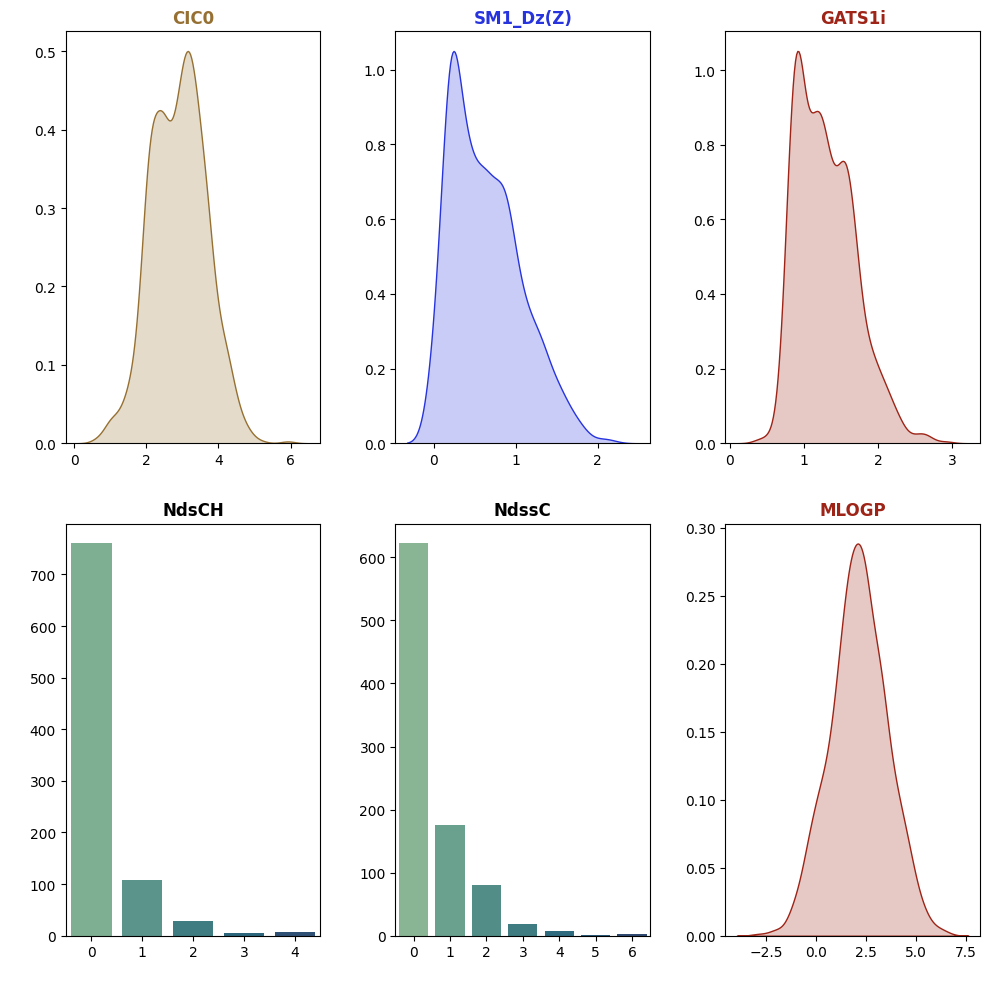

In [23]:
useful_cols = [col for col in df.columns if col not in ['quantitative response, LC50 [-LOG(mol/L)]']] # TARGET AND ID
cols_dist = [col for col in useful_cols if col not in ['NdssC', 'NdsCH']]  # CATEGORICAL DATA
color_ = [ '#9D2417', '#AF41B4', '#003389' ,'#3C5F41',  '#967032', '#2734DE']
cmap_ = ['magma', 'copper', 'crest']


plt.figure(figsize= (10,10))
for i,col in enumerate(df[useful_cols].columns):
    rand_col = color_[random.sample(range(6), 1)[0]]
    plt.subplot(2,3, i+1) # SUBPLOTS
    if col in cols_dist:

        sns.kdeplot(df[col], color = rand_col, fill = rand_col )
        plt.title(col,weight = 'bold', color = rand_col)
        plt.ylabel(" ")
        plt.xlabel(" ")
        plt.tight_layout()
    else:
        sns.countplot(data = df , x = col, palette = cmap_[random.sample(range(3), 1)[0]] )
        plt.title(col,weight = 'bold', color = 'black')
        plt.ylabel(" ")
        plt.xlabel(" ")
        plt.tight_layout()

sns.kdeplot(np.log(df['instrumentalness']), color = rand_col, fill = rand_col )
plt.tight_layout()
plt.show();

C:\Users\ISHANSINGH\AppData\Roaming\Python\Python311\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: xlabel='SM1_Dz(Z)', ylabel='Density'>

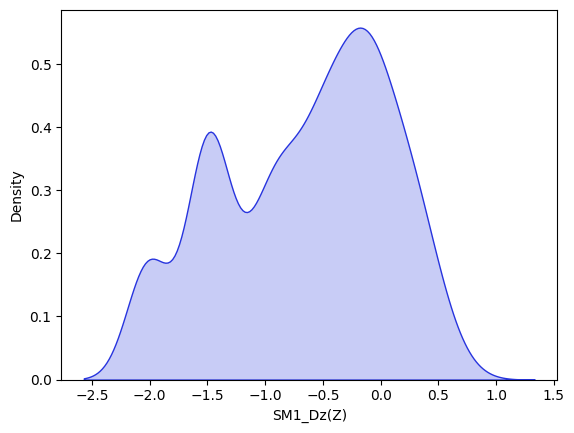

In [24]:
sns.kdeplot(np.log(df['SM1_Dz(Z)']), color = rand_col, fill = rand_col )

<Axes: xlabel='GATS1i', ylabel='Density'>

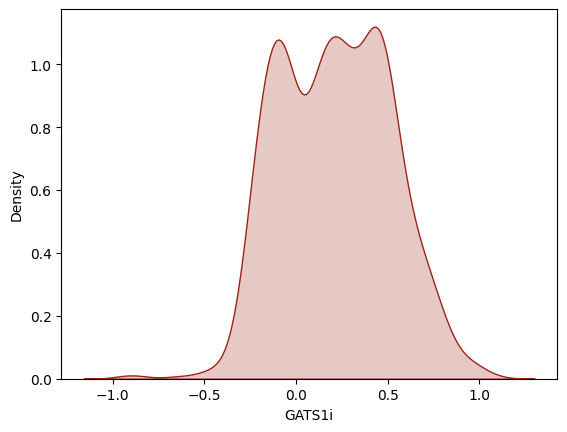

In [ ]:
sns.kdeplot(np.log(df['GATS1i']), color = rand_col, fill = rand_col )

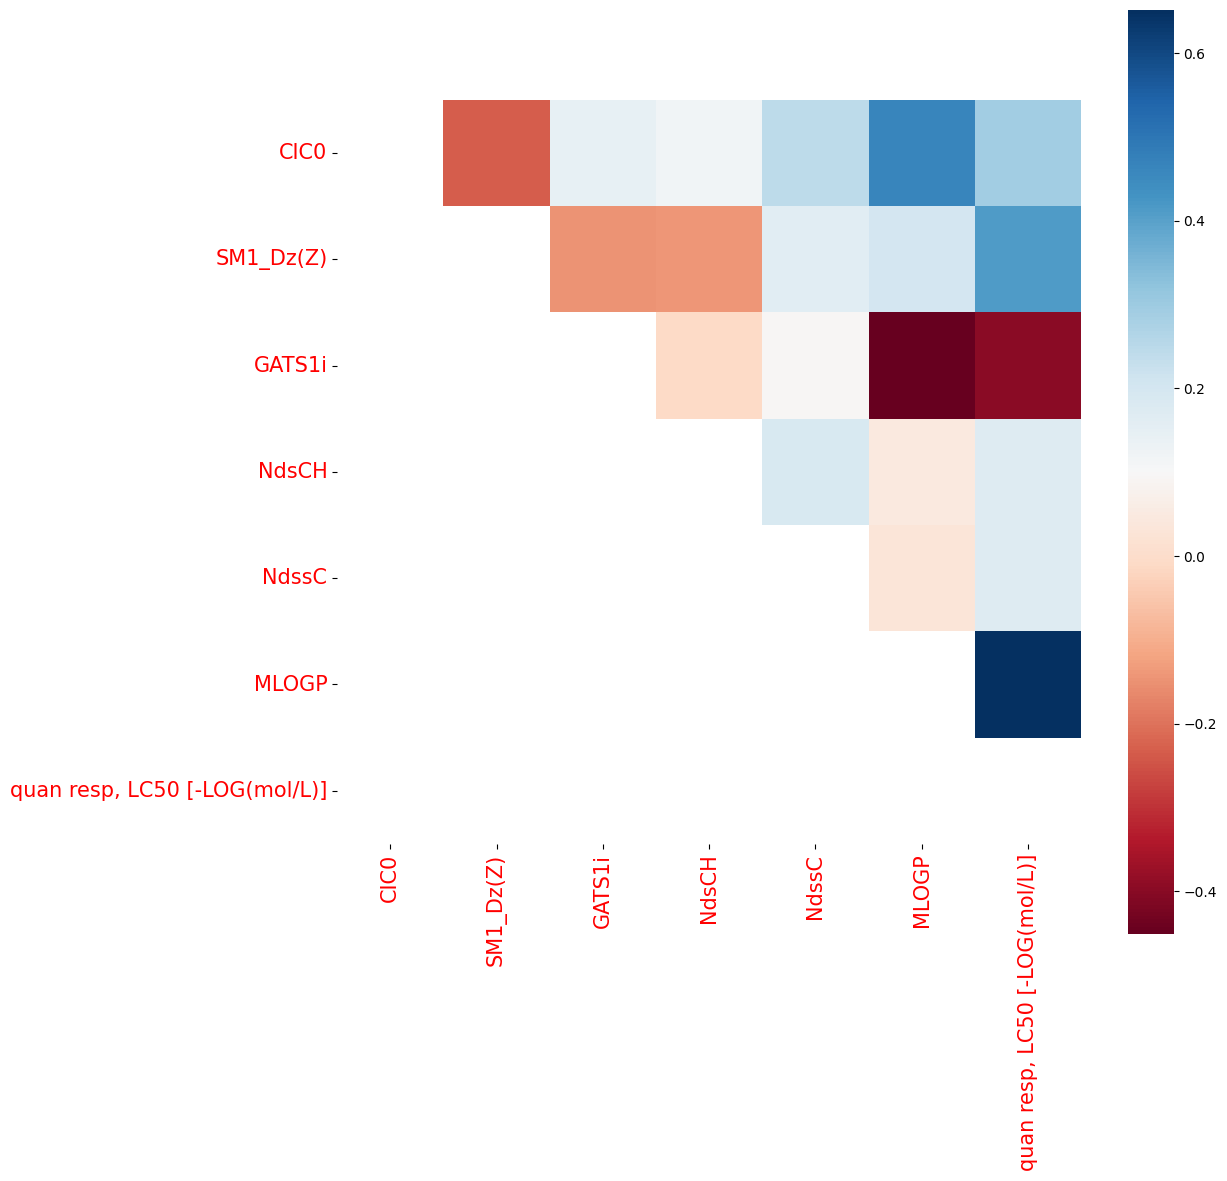

In [25]:
plt.figure(figsize = (12,12))
corr_matrix=df.corr()

matrix = np.tril(corr_matrix) # take lower correlation matrix

# Draw the heatmap with the mask
sns.heatmap(corr_matrix.T, mask=matrix, square=True, cmap = 'RdBu')
plt.xticks(size = 15,color = 'red')
plt.yticks(size = 15,  color = 'red');

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=['quan resp, LC50 [-LOG(mol/L)]']),
                                                 df['quan resp, LC50 [-LOG(mol/L)]'],
                                                 test_size=0.2,
                                                random_state=20)

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline,make_pipeline

In [28]:
trf1  = ColumnTransformer([
    ('ohe_sex_embarked',OneHotEncoder(sparse=False,handle_unknown='ignore'),[3,4])
],remainder='passthrough')


In [29]:
# train the model
from sklearn.tree import DecisionTreeRegressor

trf2 = DecisionTreeRegressor()

In [30]:
pipe = Pipeline([
    ('trf1',trf1),
    ('trf2',trf2)
])

In [31]:
pipe.fit(X_train,y_train)

C:\Users\ISHANSINGH\AppData\Roaming\Python\Python311\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('trf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_sex_embarked',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  [3, 4])])),
                ('trf2', DecisionTreeRegressor())])

In [32]:
pipe.named_steps

{'trf1': ColumnTransformer(remainder='passthrough',
                   transformers=[('ohe_sex_embarked',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse=False),
                                  [3, 4])]),
 'trf2': DecisionTreeRegressor()}

In [33]:
from sklearn import set_config
set_config(display='diagram')

In [34]:
y_test.shape

(182,)

In [35]:
y_pred = pipe.predict(X_test)
y_pred.shape

(182,)

In [36]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

1.567990002851038

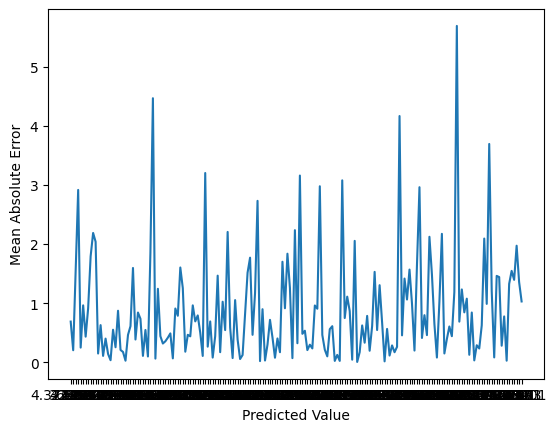

In [ ]:
# plot of the increase of mean absolute error with prediction error
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# real value
expected = list(y_test)
# predicted value
predicted = list(y_pred)
# calculate errors
errors = list()
for i in range(len(expected)):
	# calculate error
	err = abs((expected[i] - predicted[i]))
	# store error
	errors.append(err)
	# report error
	#print('>%.1f, %.1f = %.3f' % (expected[i], predicted[i], err))
# plot errors
pyplot.plot(errors)
pyplot.xticks(ticks=[i for i in range(len(errors))], labels=predicted)
pyplot.xlabel('Predicted Value')
pyplot.ylabel('Mean Absolute Error')
pyplot.show()